In [7]:
# import the libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [8]:
# create dataframe and read in the excel file
df = pd.read_csv('Nat_Gas.csv')

In [9]:
# check to make sure the data looks good
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


<Figure size 1000x1000 with 0 Axes>

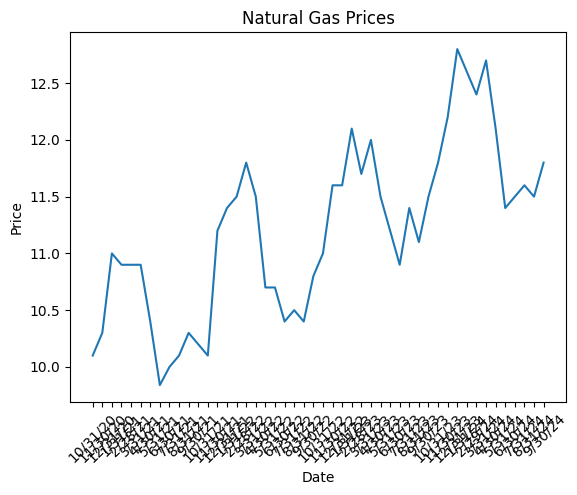

<Figure size 1000x1000 with 0 Axes>

In [10]:
# create a visulaization
plt.plot(df['Dates'], df['Prices'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Natural Gas Prices')
plt.xticks(rotation = 45)
plt.figure(figsize=(10, 10))

In [11]:
# made the dates column be converted into dates that we can work with - using to_datetime
df['Dates'] = pd.to_datetime(df['Dates'])

# created new column to store the amount of days since the start
df['Days_Since_Start'] = (df['Dates'] - df['Dates'].min()).dt.days

X = df['Days_Since_Start'].values.reshape(-1,1)
y = df['Prices'].values

In [12]:
# checking to see if the columns were created
df.head()

,Dates,Prices,Days_Since_Start
0,2020-10-31,10.1,0
1,2020-11-30,10.3,30
2,2020-12-31,11.0,61
3,2021-01-31,10.9,92
4,2021-02-28,10.9,120


In [13]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [14]:
# created a function that takes an array of dates and returns the estimated prices 
def estimate_prices(dates):

    # this line finds the minimum date in the dataframe -which represents the earliest date
    start_date = df['Dates'].min()

    Days_Since_Start = (pd.to_datetime(dates) - start_date).days

    # this line uses the trained model to predict the prices
    prices_estimated = model.predict([[Days_Since_Start]])
    
    return prices_estimated[0]

In [15]:
input_date = '2023-09-27'
estimated_price_example =estimate_prices(input_date)
print(f'The estimated price of natural gas on {input_date} is {estimated_price_example:2f}.')

The estimated price of natural gas on 2023-09-27 is 11.651640.


In [16]:
# empty list where we'll store our results
extrapolated_prices = []

for i in range(365):
    future_date = pd.to_datetime(input_date) + pd.DateOffset(days=i)
    extrapolated_price_singular = estimate_prices(future_date)
    extrapolated_prices.append(extrapolated_price_singular)

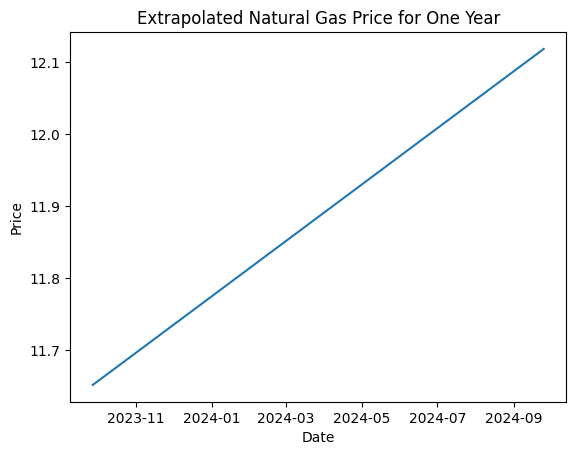

<Figure size 1000x1000 with 0 Axes>

In [17]:
plt.plot(pd.date_range(start=input_date, periods= 365, freq='D'), extrapolated_prices)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Extrapolated Natural Gas Price for One Year')
plt.figure(figsize=(10,10))
plt.show()

In [18]:
extrapolated_prices

[11.651639514236875,
 11.652921887835635,
 11.654204261434394,
 11.655486635033155,
 11.656769008631915,
 11.658051382230676,
 11.659333755829437,
 11.660616129428195,
 11.661898503026956,
 11.663180876625717,
 11.664463250224477,
 11.665745623823236,
 11.667027997421997,
 11.668310371020757,
 11.669592744619518,
 11.670875118218277,
 11.672157491817037,
 11.673439865415798,
 11.674722239014558,
 11.676004612613319,
 11.677286986212078,
 11.678569359810838,
 11.679851733409599,
 11.68113410700836,
 11.68241648060712,
 11.683698854205879,
 11.68498122780464,
 11.6862636014034,
 11.68754597500216,
 11.688828348600921,
 11.69011072219968,
 11.69139309579844,
 11.692675469397201,
 11.693957842995962,
 11.695240216594723,
 11.696522590193482,
 11.697804963792242,
 11.699087337391003,
 11.700369710989763,
 11.701652084588522,
 11.702934458187283,
 11.704216831786043,
 11.705499205384804,
 11.706781578983565,
 11.708063952582323,
 11.709346326181084,
 11.710628699779845,
 11.711911073378605,


In [19]:
df['Prices'].nlargest(n = 10)

38    12.8
41    12.7
39    12.6
40    12.4
37    12.2
27    12.1
42    12.1
29    12.0
16    11.8
36    11.8
Name: Prices, dtype: float64

In [20]:
df['Prices'].nsmallest(n = 10)

7      9.84
8     10.00
0     10.10
9     10.10
12    10.10
11    10.20
1     10.30
10    10.30
6     10.40
20    10.40
Name: Prices, dtype: float64

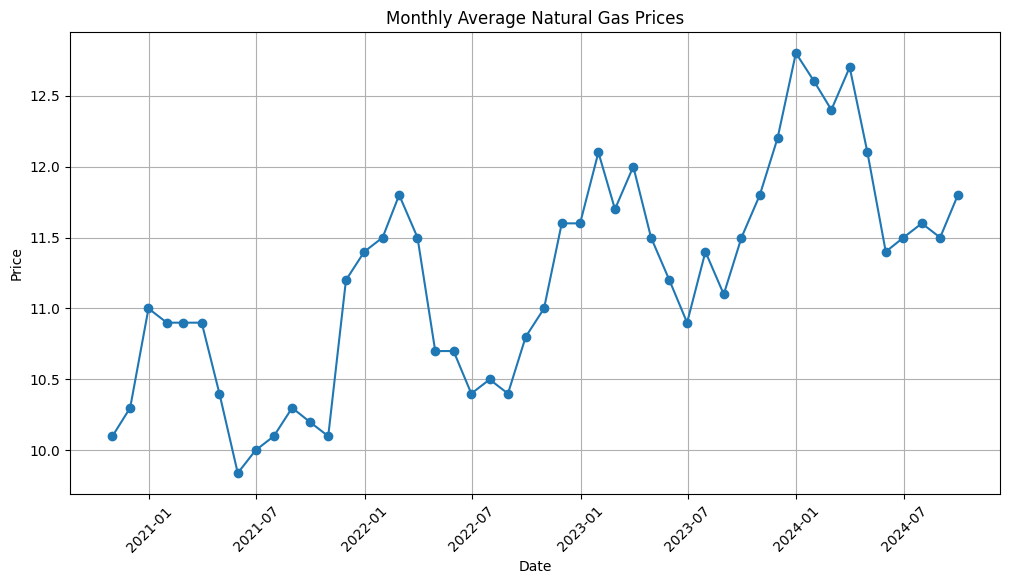

In [21]:
# monthly average natural gas prices
monthly_data = df.resample('M', on='Dates').mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Prices'], marker='o', linestyle='-', markersize=6)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monthly Average Natural Gas Prices')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

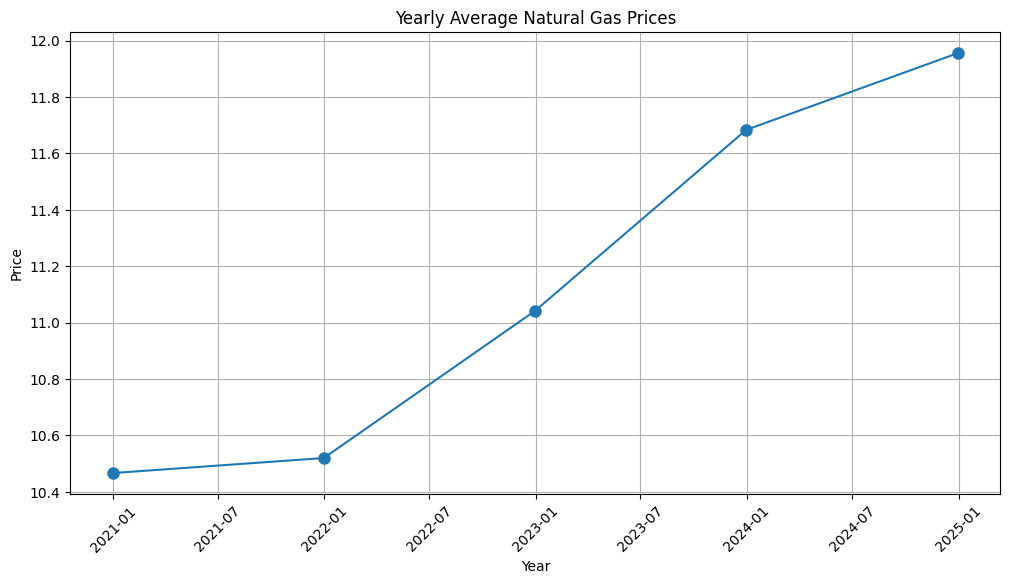

In [22]:
# yearly average natural gas prices
yearly_data = df.resample('Y', on='Dates').mean()
plt.figure(figsize=(12, 6))
plt.plot(yearly_data.index, yearly_data['Prices'], marker='o', linestyle='-', markersize=8)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Yearly Average Natural Gas Prices')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()